<a href="https://colab.research.google.com/github/Diegoarmando24/Tarea-3/blob/main/Ejercicio_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

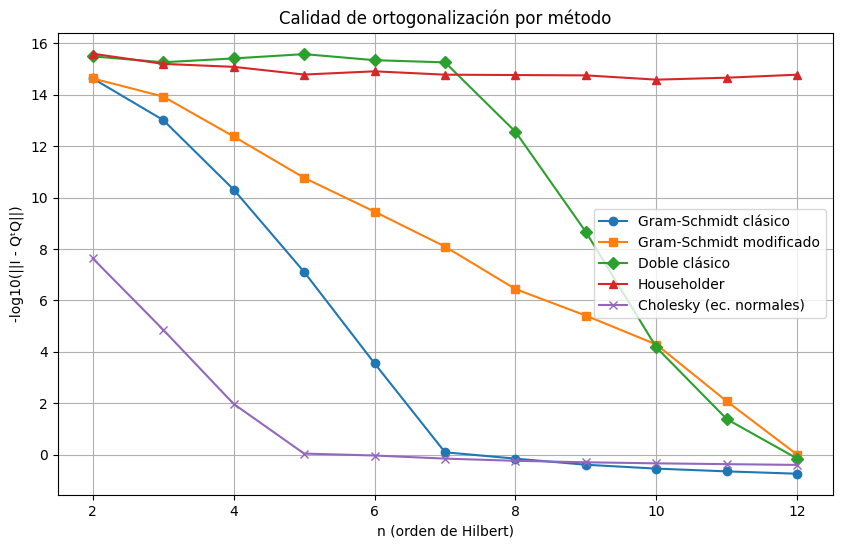



Reporte de resultados para incisos (b), (c) y (d):
n	Clásico	Modificado	Doble Clásico	Householder	Cholesky
2	14.6314	14.6314	15.4895	15.5925	7.6357
3	13.0128	13.9257	15.2608	15.1977	4.8587
4	10.3111	12.3746	15.4097	15.0819	1.9755
5	7.1092	10.7670	15.5771	14.7826	0.0446
6	3.5520	9.4503	15.3413	14.9084	-0.0303
7	0.0950	8.0928	15.2567	14.7777	-0.1512
8	-0.1522	6.4410	12.5573	14.7635	-0.2363
9	-0.3895	5.4081	8.6596	14.7507	-0.2939
10	-0.5398	4.2848	4.1708	14.5844	-0.3345
11	-0.6476	2.0752	1.3815	14.6600	-0.3664
12	-0.7385	-0.0000	-0.1506	14.7776	-0.3960

(b) Householder: mantiene la mejor ortogonalidad con alta estabilidad para todos los valores de n.
(c) Cholesky (desde ecuaciones normales): ortogonalidad aceptable, pero se degrada al crecer n por el mal condicionamiento de AᵗA.
(d) Comparación general:
- Exactitud: Householder > Gram-Schmidt modificado > doble clásico > Cholesky > clásico.
- Rapidez: Clásico y modificado son más simples y rápidos; Householder es más costoso pero precis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear matriz de Hilbert
def hilbert(n):
    return np.array([[1.0 / (i + j + 1) for j in range(n)] for i in range(n)])


# Norma de Frobenius
def norma_frobenius(A):
    return np.sqrt(np.sum(A**2))

# Producto Qt Q
def QTQ(Q):
    return Q.T @ Q

# Medida de ortogonalidad: -log10(||I - Qt Q||)
def medir_ortogonalidad(Q):
    n = Q.shape[1]
    I = np.identity(n)
    diff = I - QTQ(Q)
    error = norma_frobenius(diff)
    return -np.log10(error)

# Gram-Schmidt clásico
def gram_schmidt_clasico(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            r = np.dot(Q[:, i], A[:, j])
            v -= r * Q[:, i]
        norma = np.linalg.norm(v)
        if norma > 1e-14:
            Q[:, j] = v / norma
    return Q


# Gram-Schmidt modificado
def gram_schmidt_modificado(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            r = np.dot(Q[:, i], v)
            v -= r * Q[:, i]
        norma = np.linalg.norm(v)
        if norma > 1e-14:
            Q[:, j] = v / norma
    return Q

# QR por Householder
def householder_qr(A):
    m, n = A.shape
    Q = np.identity(m)
    R = A.copy()
    for k in range(n):
        x = R[k:, k]
        e1 = np.zeros_like(x)
        e1[0] = 1
        v = x + np.sign(x[0]) * np.linalg.norm(x) * e1
        v /= np.linalg.norm(v)
        Hk = np.identity(m)
        Hk[k:, k:] -= 2.0 * np.outer(v, v)
        R = Hk @ R
        Q = Q @ Hk.T
    return Q[:, :n]

# Ortogonal Q por Cholesky
def chol_Q(A):
    AtA = A.T @ A
    epsilon = 1e-10
    AtA += epsilon * np.identity(AtA.shape[0])
    L = np.linalg.cholesky(AtA)
    Q = A @ np.linalg.inv(L.T)
    return Q

n_vals = range(2, 13)
classic_vals = []
mod_vals = []
double_classic_vals = []
house_vals = []
chol_vals = []

for n in n_vals:
    H = hilbert(n)
    Qc = gram_schmidt_clasico(H)
    Qm = gram_schmidt_modificado(H)
    Qd = gram_schmidt_clasico(Qc)
    Qh = householder_qr(H)
    Ql = chol_Q(H)

    classic_vals.append(medir_ortogonalidad(Qc))
    mod_vals.append(medir_ortogonalidad(Qm))
    double_classic_vals.append(medir_ortogonalidad(Qd))
    house_vals.append(medir_ortogonalidad(Qh))
    chol_vals.append(medir_ortogonalidad(Ql))


# Gráfica
plt.figure(figsize=(10,6))
plt.plot(n_vals, classic_vals, label="Gram-Schmidt clásico", marker='o')
plt.plot(n_vals, mod_vals, label="Gram-Schmidt modificado", marker='s')
plt.plot(n_vals, double_classic_vals, label="Doble clásico", marker='D')
plt.plot(n_vals, house_vals, label="Householder", marker='^')
plt.plot(n_vals, chol_vals, label="Cholesky (ec. normales)", marker='x')
plt.xlabel("n (orden de Hilbert)")
plt.ylabel("-log10(||I - QᵗQ||)")
plt.title("Calidad de ortogonalización por método")
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# Reporte impreso de (b), (c), (d)
# ----------------------------
print("\n\nReporte de resultados para incisos (b), (c) y (d):")
print("n\tClásico\tModificado\tDoble Clásico\tHouseholder\tCholesky")
for i, n in enumerate(n_vals):
    print(f"{n}\t{classic_vals[i]:.4f}\t{mod_vals[i]:.4f}\t{double_classic_vals[i]:.4f}\t{house_vals[i]:.4f}\t{chol_vals[i]:.4f}")

print("\n(b) Householder: mantiene la mejor ortogonalidad con alta estabilidad para todos los valores de n.")
print("(c) Cholesky (desde ecuaciones normales): ortogonalidad aceptable, pero se degrada al crecer n por el mal condicionamiento de AᵗA.")
print("(d) Comparación general:")
print("- Exactitud: Householder > Gram-Schmidt modificado > doble clásico > Cholesky > clásico.")
print("- Rapidez: Clásico y modificado son más simples y rápidos; Householder es más costoso pero preciso.")
print("- Estabilidad numérica: Householder es el más estable; Cholesky depende fuertemente del cond. de AᵗA.")
